# Sign Digits Convolution
a deep learning convolutional neural network to distinguish between six digs based on function API. TensorFlow and the Keras Framework are used in this project to implement forward and backward propagation.

> In sequential model you can only stack one layer after another, while in functional model you can connect a layer to literally any other layer

<img src="images/seq_vs_func.png" style="width:350px;height:200px;">

## 1. Required framworks
To implement the project, multiple packages need to be installed.
- numpy
- h5py
- matplotlib
- scipy
- PIL
- pandas
- tensorflow

In [4]:
import math
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


%matplotlib inline
np.random.seed(1)

## 2. dataset spliting 
Load the dataset from h5py and split the dataset into training and test sets.

In [5]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

The Y is an array consisting of one row and 1080 columns. Each column value ranges from 0 to 5, representing the image digit; however, this type of data cannot be used directly in our model. To do it correctly, first use **np.reshape(-1)** to convert the Y form (1,1080) to (1080,1), then use **np.eye(number of classes)** to convert each value into an array of length 6. For example, if the original value is 3, the new value should be [0,0,0,1,0,0], and this is only accepted for the softmax activation function.

In [70]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    
    return Y

In [71]:
convert_to_one_hot(Y_train_orig,6).shape

(1080, 6)

In [72]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Display a random image from the dataset.

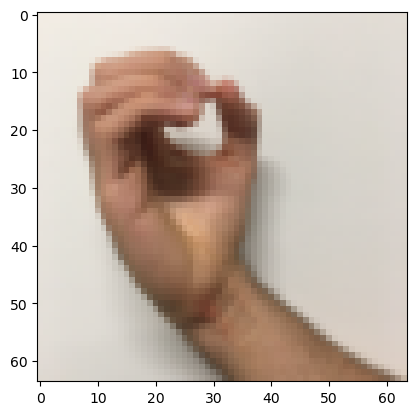

In [100]:
index = random.randint(0,X_train_orig.shape[0])

plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

## 3. Desgin the system model

The system model contains multiple layers: first CONV2D, then RELU, MAXPOOL, CONV2D, RELU, MAXPOOL, FLATTEN, and the last layer is DENSE is a classic fully connected layer.The output layer uses softmax as an activation function. Because it consists of six different outputs

**CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE**

In [74]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [75]:
conv_model = convolutional_model((64, 64, 3))

### 3.1 Loss function (Error)

There are many loss functions that can be used in Keras tensorflow. Because this project is binary classification, the proper method is binary cross entropy. Read more [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 3.2 Optimization methods for reducing overfitting

As a loss function, TensorFlow contains many optimization methods for reducing overfitting, such as Adam, SGD, and RMSprop, etc. For more information, see this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### 3.3 Evaluate the system mode.

Accuracy, recall, precision, and more are all metrics offered by the TensorFlow Framework to evaluate the system model.[See more](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [76]:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [77]:
conv_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_5 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [103]:
tf.keras.utils.plot_model(conv_model, "my_first_model_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [79]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 64ms/step - loss: 1.7325 - accuracy: 0.4083 - val_loss: 1.7224 - val_accuracy: 0.4583
Epoch 2/100
17/17 [==============================] - 1s 68ms/step - loss: 1.7163 - accuracy: 0.4213 - val_loss: 1.7051 - val_accuracy: 0.4833
Epoch 3/100
17/17 [==============================] - 1s 70ms/step - loss: 1.6966 - accuracy: 0.4565 - val_loss: 1.6861 - val_accuracy: 0.4583
Epoch 4/100
17/17 [==============================] - 1s 64ms/step - loss: 1.6729 - accuracy: 0.4741 - val_loss: 1.6603 - val_accuracy: 0.4667
Epoch 5/100
17/17 [==============================] - 1s 67ms/step - loss: 1.6454 - accuracy: 0.4806 - val_loss: 1.6352 - val_accuracy: 0.4500
Epoch 6/100
17/17 [==============================] - 1s 60ms/step - loss: 1.6151 - accuracy: 0.4806 - val_loss: 1.6036 - val_accuracy: 0.4000
Epoch 7/100
17/17 [==============================] - 1s 57ms/step - loss: 1.5824 - accuracy: 0.4750 - val_loss: 1.5702 - val_accuracy: 0.4250
Epoch 

17/17 [==============================] - 1s 78ms/step - loss: 0.6320 - accuracy: 0.7759 - val_loss: 0.7498 - val_accuracy: 0.7250
Epoch 59/100
17/17 [==============================] - 1s 74ms/step - loss: 0.6271 - accuracy: 0.7787 - val_loss: 0.7457 - val_accuracy: 0.7250
Epoch 60/100
17/17 [==============================] - 1s 64ms/step - loss: 0.6223 - accuracy: 0.7796 - val_loss: 0.7408 - val_accuracy: 0.7333
Epoch 61/100
17/17 [==============================] - 1s 66ms/step - loss: 0.6172 - accuracy: 0.7843 - val_loss: 0.7364 - val_accuracy: 0.7333
Epoch 62/100
17/17 [==============================] - 1s 64ms/step - loss: 0.6124 - accuracy: 0.7861 - val_loss: 0.7317 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 1s 65ms/step - loss: 0.6079 - accuracy: 0.7861 - val_loss: 0.7271 - val_accuracy: 0.7250
Epoch 64/100
17/17 [==============================] - 1s 64ms/step - loss: 0.6031 - accuracy: 0.7870 - val_loss: 0.7231 - val_accuracy: 0.7250
Epoch 65/100

**Display the loss and accuracy. important point: the system evaluates the system after each epoch and stores the result in a dictionary. the use of "loss and accuracy" for training data and "val_loss and val_accuracy" for test data.**

In [83]:
type(history.history)

dict

In [85]:
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc

,loss,accuracy,val_loss,val_accuracy
0,1.732542,0.408333,1.722394,0.458333
1,1.716273,0.421296,1.705102,0.483333
2,1.696604,0.456481,1.686099,0.458333
3,1.672872,0.474074,1.660258,0.466667
4,1.645373,0.480556,1.635240,0.450000
...,...,...,...,...
95,0.465953,0.846296,0.606641,0.758333
96,0.462853,0.848148,0.604231,0.758333
97,0.458953,0.849074,0.600117,0.758333
98,0.454938,0.850926,0.597423,0.766667


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

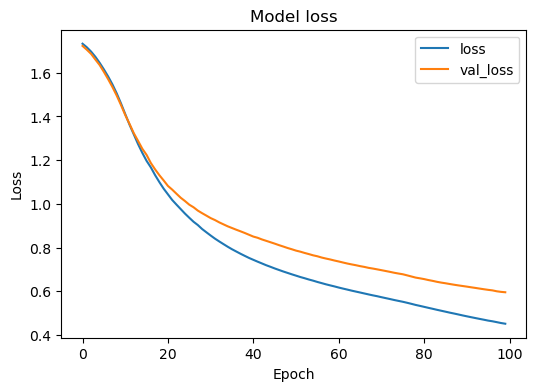

In [97]:
# select the loss(training) and val_loss
df_loss= df_loss_acc[['loss','val_loss']] 
# df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')

# loss -> training, val_loss -> test

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

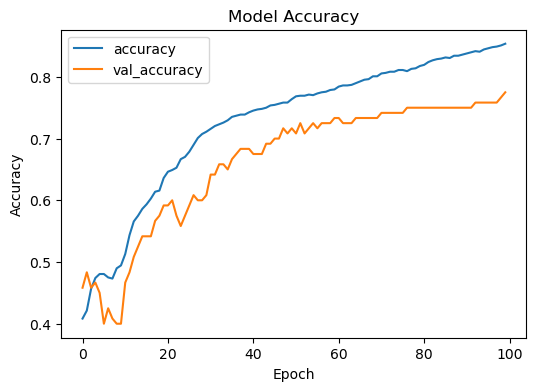

In [99]:
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

## 4. Testing 

1/1 [==============================] - 0s 31ms/step
The number of this image is 4


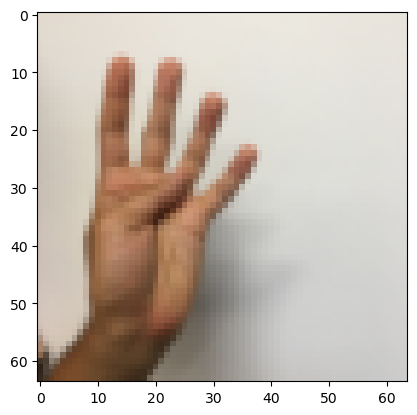

In [181]:
index = random.randint(0,X_test.shape[0])

plt.imshow(X_test_orig[index]) #display sample training image
# plt.show()
# print(X_test[0:1].shape)
which_digit = conv_model.predict(X_test[index:index+1])

number = np.where(np.squeeze(which_digit)>0.5)[0][0]

print("The number of this image is", number)